In [ ]:
import pandas as pd
import matplotlib.pyplot as pltt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/car data.csv')
dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
dataset.shape

(301, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
dataset.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
dataset.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
dataset.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
x = dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = dataset['Selling_Price']

In [ ]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#LR

lnr = LinearRegression()
lnr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = lnr.predict(x_test)

In [ ]:
error_score_lr = metrics.r2_score(y_test, y_pred_lr)
print("R square error = ",error_score_lr)

R square error =  0.8401532365377697


In [ ]:
#LASSO

ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

In [ ]:
y_pred_lasso = ls.predict(x_test)

In [ ]:
error_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print("R square error = ",error_score_lasso)

R square error =  0.8497457570738539


In [ ]:
# XGB

xg = XGBRegressor()
xg.fit(x_train,y_train)

[09:17:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred_x = xg.predict(x_test)

In [ ]:
error_score_x = metrics.r2_score(y_test, y_pred_x)
print("R square error = ",error_score_x)

R square error =  0.9570973965617354


In [ ]:
# D-Tree

from sklearn.tree import DecisionTreeRegressor

dct = DecisionTreeRegressor()

dct.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_d = dct.predict(x_test)

In [ ]:
error_score_d = metrics.r2_score(y_test, y_pred_d)
print("R square error = ",error_score_d)

R square error =  0.9356967600821803


In [ ]:
# LGBM

import lightgbm as lgbm

lgbm = lgbm.LGBMRegressor()

lgbm.fit(x_train,y_train)

y_pred_lgbm = lgbm.predict(x_test)

error_score_lgbm = metrics.r2_score(y_test, y_pred_lgbm)
print("R square error = ",error_score_lgbm)

R square error =  0.8583804893938443


In [ ]:
#test_the_model

dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
dt = {'Year':2014, 'Present_Price':5.59, 'Kms_Driven':27000,
       'Fuel_Type':0, 'Seller_Type':0, 'Transmission':0, 'Owner':0}
index=[0]
new_dataset = pd.DataFrame(dt,index)
new_dataset

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0


In [ ]:
new_pred = ls.predict(new_dataset)
print("The selling price for the new data is (Lasso) = ",new_pred)

new2_pred = lnr.predict(new_dataset)
print("The selling price for the new data is (Linear) = ",new2_pred)

new3_pred = xg.predict(new_dataset)
print("The selling price for the new data is (XGBoost) = ",new3_pred)

new4_pred = dct.predict(new_dataset)
print("The selling price for the new data is (DTR) = ",new4_pred)

new5_pred = lgbm.predict(new_dataset)
print("The selling price for the new data is (LGBM) = ",new5_pred)

The selling price for the new data is (Lasso) =  [3.81549633]
The selling price for the new data is (Linear) =  [3.82765933]
The selling price for the new data is (XGBoost) =  [3.4568057]
The selling price for the new data is (DTR) =  [3.35]
The selling price for the new data is (LGBM) =  [3.64811918]


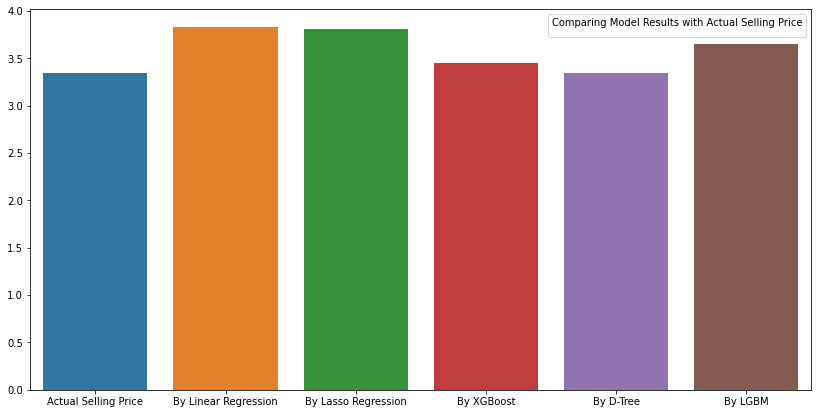

In [ ]:
datf = pd.DataFrame({"Actual Selling Price": dataset.Selling_Price[0],
                 "By Linear Regression" : new2_pred,
                 "By Lasso Regression" : new_pred,
                 "By XGBoost" : new3_pred,
                 "By D-Tree" : new4_pred,
                 "By LGBM" : new5_pred})
rcParams['figure.figsize'] = 14, 7

p = sns.barplot(data = datf)
pltt.legend(loc = 'best', title = 'Comparing Model Results with Actual Selling Price')
pltt.show()

In [ ]:
from tabulate import tabulate

In [ ]:
table = [['Model Name', 'R-Squared Error'], 
         ['Linear Regression', error_score_lr], 
         ['Lasso Regression', error_score_lasso],
         ['LGBM', error_score_lgbm],
         ['D-Tree', error_score_d], 
         ['XGBOOST', error_score_x]]

In [ ]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤═══════════════════╕
│ Model Name        │   R-Squared Error │
╞═══════════════════╪═══════════════════╡
│ Linear Regression │          0.840153 │
├───────────────────┼───────────────────┤
│ Lasso Regression  │          0.849746 │
├───────────────────┼───────────────────┤
│ LGBM              │          0.85838  │
├───────────────────┼───────────────────┤
│ D-Tree            │          0.935697 │
├───────────────────┼───────────────────┤
│ XGBOOST           │          0.957097 │
╘═══════════════════╧═══════════════════╛
